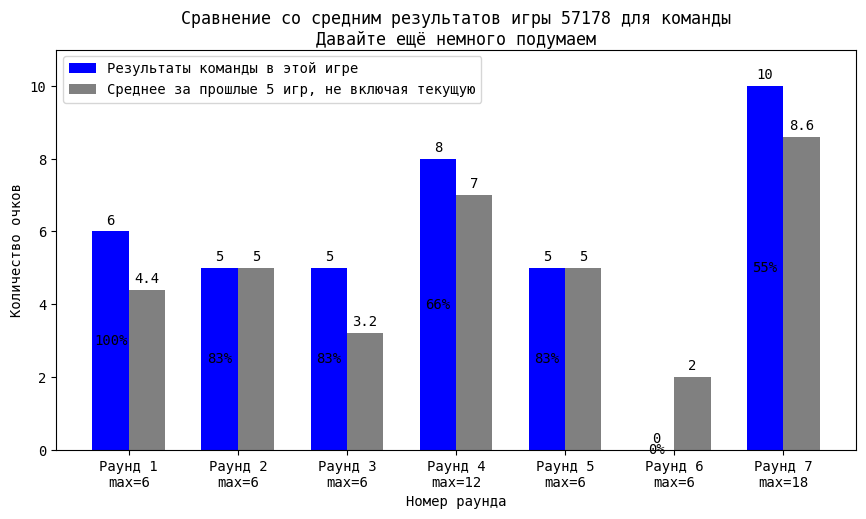

In [61]:

import sys

sys.path.append('../')

from matplotlib.axes import Axes
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from src.gamedb import offline_games_df
import matplotlib
import pandas as pd

game_id = 57178
team_name = 'Давайте ещё немного подумаем'

max_round_scores = [6,6,6,12,6,6,18]
round_numbers = [1,2,3,4,5,6,7]

fig: Figure
ax: Axes
fig = plt.figure(figsize = (10, 5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

matplotlib.rcParams['font.family'] = 'monospace'

team_data:pd.DataFrame= offline_games_df.loc[offline_games_df['team_name'] == team_name]
latest_team_average = team_data.tail(5).loc[:,'round_1':'final_score'].mean()
game_team_score = team_data.loc[(game_id,),:]

for round_number in round_numbers:
    is_total_score = (round_number == 0)
    round_name = f"round_{round_number}" if not is_total_score else 'final_score'

    team_round_score = game_team_score[round_name].item()
    avg_round_score = latest_team_average[round_name].item()

    team_bar = ax.bar(round_number * 3 - 2, team_round_score, width=1, color='blue', label='Результаты команды в этой игре')
    avg_bar = ax.bar(round_number * 3 - 1, avg_round_score,  width=1, color='gray', label='Среднее за прошлые 5 игр, не включая текущую')

    team_percent =  int(team_round_score / max_round_scores[round_number-1] * 100)
    avg_percent =  int(avg_round_score / max_round_scores[round_number-1] * 100)

    ax.bar_label(team_bar, padding=3)
    ax.bar_label(team_bar, [f"{team_percent}%"] ,label_type='center', color='w')
    ax.bar_label(avg_bar, padding=3)
    ax.bar_label(avg_bar, [f"{avg_percent}%"] ,label_type='center', color='w')

ax.set_xticks([-1.5 + rn * 3 for rn in round_numbers], [f"Раунд {rn}\nmax={max_round_scores[rn-1]}" for rn in round_numbers])
ax.set_xlabel("Номер раунда")
ax.set_ylabel("Количество очков")
ax.set_ymargin(0.1)

fig.suptitle(f'Сравнение со средним результатов игры {game_id} для команды\n{team_name}')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()
